## Deep Work (A tanget)
- Approx 3hrs per day
- AI can help you do more with those 3 hours

# Data Cleaning
- Pandas will ignore missing values
- `iloc()` select rows and columns by position
- `loc()` select rows and columns based on name 
## Cleaning Loop
1. Look at data shape
2. Look at holes in data
3. Go column by coulumn and try to explain why the data is missing
   - Value Counts
   - Merge similar catagoires
5. Patch holes or remove missing data
6. Convert Data to numbers
    - Convert strings to numbers if possible
7. Refactor data filters into fucntions
8. Make a function that does all the filtering
9. Move the fucntion that does the data cleaning to the top of the notebook right under the data loading
   - Then get ride of redundant cells

In [3]:
import matplotlib.pyplot as plt
import missingno as mn
import numpy as np
import pandas as pd

# Standard Python Lib
import io
import urllib.request as req
import zipfile

In [7]:
df = pd.read_excel('Data_2019Run_Injection_42days.xlsx')

In [8]:
df.shape

(10292, 52)

In [9]:
df

,Time (min),SPEAR:BeamCurrAvg1S,SPEAR:RFFreqHzNo476,BTS:ACMChargeAvgFill,BOO-QM:BeamInjectEffFill,BTS:ACMBeamInjectEffFill,BTS:ToroidBeamInjectEffFill,SPEAR:BeamFillRate,BTS:BPMXRMSFillAvg,BTS:BPMYRMSFillAvg,...,BTS-B8V:Curr,BTS-B9V:Curr,BTS-B2B6:Curr,BL05:Gap,BL05:EPUPhase,BL12-1:Gap,BL12-2:Gap,BL15:AverageGap,116-TC:R1C04Temp,18G-TC:R2C06Temp
0,0,495.15979,-8760.3096,75.807503,83.631577,80.321426,117.97433,47.116753,0.498448,0.052230,...,315.88345,271.97717,887.48157,61.861599,0.249971,27.000999,7.435863,7.3652,13.329232,30.234785
1,5,495.19626,-8760.3096,76.998283,82.140343,78.614784,115.30141,47.076141,0.492290,0.046041,...,315.87308,271.97742,887.48126,61.861599,0.249971,27.000900,7.435863,7.3652,12.996583,30.085579
2,10,495.08453,-8760.2900,75.979019,87.828766,84.116676,125.33250,47.334351,0.482850,0.050314,...,315.89230,271.97717,887.49414,61.861599,0.249971,27.000900,7.435863,7.3652,13.214413,30.212221
3,15,495.08957,-8760.3096,75.356003,83.787109,79.814262,116.80741,45.765423,0.481856,0.055074,...,315.87512,271.97705,887.47046,61.861599,0.249971,27.000900,7.435863,7.3652,13.229985,30.217730
4,20,495.06805,-8760.2900,76.271378,84.879524,80.728096,122.19676,47.371410,0.484830,0.056821,...,315.86502,271.97726,887.49597,61.861599,0.249971,27.000900,7.435863,7.3652,13.123254,30.215282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10287,60455,493.94205,-7938.0200,63.334019,85.289101,90.681755,151.97296,43.699646,0.140653,0.064632,...,314.28564,270.94635,887.48975,61.050800,-0.000029,26.999201,7.442654,7.8264,7.254952,28.892788
10288,60460,493.98441,-7937.5298,62.084057,85.189468,89.992104,149.45493,43.183498,0.134571,0.037680,...,314.28745,270.94614,887.49109,61.050800,-0.000029,26.999201,7.442654,7.8264,7.662625,28.778229
10289,60465,494.03125,-7937.3101,63.155415,87.746300,93.786789,159.04097,43.819725,0.121870,0.028115,...,314.28619,270.94641,887.48633,61.050800,-0.000029,26.999201,7.442654,7.8264,7.819812,28.889343
10290,60470,493.97095,-7937.2100,60.850719,87.039932,92.507294,153.58708,41.959595,0.116959,0.029027,...,314.28790,270.94623,887.50616,61.050800,-0.000029,26.999201,7.442654,7.8264,7.900143,28.746477


In [10]:
df.columns

Index(['Time (min)', 'SPEAR:BeamCurrAvg1S', 'SPEAR:RFFreqHzNo476',
       'BTS:ACMChargeAvgFill', 'BOO-QM:BeamInjectEffFill',
       'BTS:ACMBeamInjectEffFill', 'BTS:ToroidBeamInjectEffFill',
       'SPEAR:BeamFillRate', 'BTS:BPMXRMSFillAvg', 'BTS:BPMYRMSFillAvg',
       'BTS-BPM01:XFillAvg', 'BTS-BPM02:XFillAvg', 'BTS-BPM03:XFillAvg',
       'BTS-BPM04:XFillAvg', 'BTS-BPM05:XFillAvg', 'BTS-BPM06:XFillAvg',
       'BTS-BPM07:XFillAvg', 'BTS-BPM08:XFillAvg', 'BTS-BPM09:XFillAvg',
       'BTS-BPM01:YFillAvg', 'BTS-BPM02:YFillAvg', 'BTS-BPM03:YFillAvg',
       'BTS-BPM04:YFillAvg', 'BTS-BPM05:YFillAvg', 'BTS-BPM06:YFillAvg',
       'BTS-BPM07:YFillAvg', 'BTS-BPM08:YFillAvg', 'BTS-BPM09:YFillAvg',
       'inj:BTS_CORR1H.CURR_AM', 'inj:BTS_CORR2V.CURR_AM',
       'inj:BTS_CORR3V.CURR_AM', 'inj:BTS_CORR4H.CURR_AM',
       'inj:BTS_CORR5V.CURR_AM', 'inj:BTS_CORR6H.CURR_AM',
       'inj:BTS_CORR7V.CURR_AM', 'BTS-B1V:Curr', 'BTS-B2TRIM:Curr',
       'BTS-B3TRIM:Curr', 'BTS-B4TRIM:Curr', 'BTS-B5

In [11]:
df.dtypes

Time (min)                       int64
SPEAR:BeamCurrAvg1S            float64
SPEAR:RFFreqHzNo476            float64
BTS:ACMChargeAvgFill           float64
BOO-QM:BeamInjectEffFill       float64
BTS:ACMBeamInjectEffFill       float64
BTS:ToroidBeamInjectEffFill    float64
SPEAR:BeamFillRate             float64
BTS:BPMXRMSFillAvg             float64
BTS:BPMYRMSFillAvg             float64
BTS-BPM01:XFillAvg             float64
BTS-BPM02:XFillAvg             float64
BTS-BPM03:XFillAvg             float64
BTS-BPM04:XFillAvg             float64
BTS-BPM05:XFillAvg             float64
BTS-BPM06:XFillAvg             float64
BTS-BPM07:XFillAvg             float64
BTS-BPM08:XFillAvg             float64
BTS-BPM09:XFillAvg             float64
BTS-BPM01:YFillAvg             float64
BTS-BPM02:YFillAvg             float64
BTS-BPM03:YFillAvg             float64
BTS-BPM04:YFillAvg             float64
BTS-BPM05:YFillAvg             float64
BTS-BPM06:YFillAvg             float64
BTS-BPM07:YFillAvg       

In [12]:
df.dtypes.value_counts()

float64    51
int64       1
Name: count, dtype: int64

In [13]:
# Display Missing Values 
df.isna()

,Time (min),SPEAR:BeamCurrAvg1S,SPEAR:RFFreqHzNo476,BTS:ACMChargeAvgFill,BOO-QM:BeamInjectEffFill,BTS:ACMBeamInjectEffFill,BTS:ToroidBeamInjectEffFill,SPEAR:BeamFillRate,BTS:BPMXRMSFillAvg,BTS:BPMYRMSFillAvg,...,BTS-B8V:Curr,BTS-B9V:Curr,BTS-B2B6:Curr,BL05:Gap,BL05:EPUPhase,BL12-1:Gap,BL12-2:Gap,BL15:AverageGap,116-TC:R1C04Temp,18G-TC:R2C06Temp
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Total NaNs per column
df.isna().sum()

Time (min)                     0
SPEAR:BeamCurrAvg1S            0
SPEAR:RFFreqHzNo476            0
BTS:ACMChargeAvgFill           0
BOO-QM:BeamInjectEffFill       0
BTS:ACMBeamInjectEffFill       0
BTS:ToroidBeamInjectEffFill    0
SPEAR:BeamFillRate             0
BTS:BPMXRMSFillAvg             0
BTS:BPMYRMSFillAvg             0
BTS-BPM01:XFillAvg             0
BTS-BPM02:XFillAvg             0
BTS-BPM03:XFillAvg             0
BTS-BPM04:XFillAvg             0
BTS-BPM05:XFillAvg             0
BTS-BPM06:XFillAvg             0
BTS-BPM07:XFillAvg             0
BTS-BPM08:XFillAvg             0
BTS-BPM09:XFillAvg             0
BTS-BPM01:YFillAvg             0
BTS-BPM02:YFillAvg             0
BTS-BPM03:YFillAvg             0
BTS-BPM04:YFillAvg             0
BTS-BPM05:YFillAvg             0
BTS-BPM06:YFillAvg             0
BTS-BPM07:YFillAvg             0
BTS-BPM08:YFillAvg             0
BTS-BPM09:YFillAvg             0
inj:BTS_CORR1H.CURR_AM         0
inj:BTS_CORR2V.CURR_AM         0
inj:BTS_CO

In [15]:
# Summ up ones and divide by length 
# Fraction of values missing 
# Then convert to %
(df.isna().mean() * 100).sort_values()

Time (min)                     0.0
SPEAR:BeamCurrAvg1S            0.0
SPEAR:RFFreqHzNo476            0.0
BTS:ACMChargeAvgFill           0.0
BOO-QM:BeamInjectEffFill       0.0
BTS:ACMBeamInjectEffFill       0.0
BTS:ToroidBeamInjectEffFill    0.0
SPEAR:BeamFillRate             0.0
BTS:BPMXRMSFillAvg             0.0
BTS:BPMYRMSFillAvg             0.0
BTS-BPM01:XFillAvg             0.0
BTS-BPM02:XFillAvg             0.0
BTS-BPM03:XFillAvg             0.0
BTS-BPM04:XFillAvg             0.0
BTS-BPM05:XFillAvg             0.0
BTS-BPM06:XFillAvg             0.0
BTS-BPM07:XFillAvg             0.0
BTS-BPM08:XFillAvg             0.0
BTS-BPM09:XFillAvg             0.0
BTS-BPM01:YFillAvg             0.0
BTS-BPM02:YFillAvg             0.0
BTS-BPM03:YFillAvg             0.0
BTS-BPM04:YFillAvg             0.0
BTS-BPM05:YFillAvg             0.0
BTS-BPM06:YFillAvg             0.0
BTS-BPM07:YFillAvg             0.0
BTS-BPM08:YFillAvg             0.0
BTS-BPM09:YFillAvg             0.0
inj:BTS_CORR1H.CURR_

<Axes: >

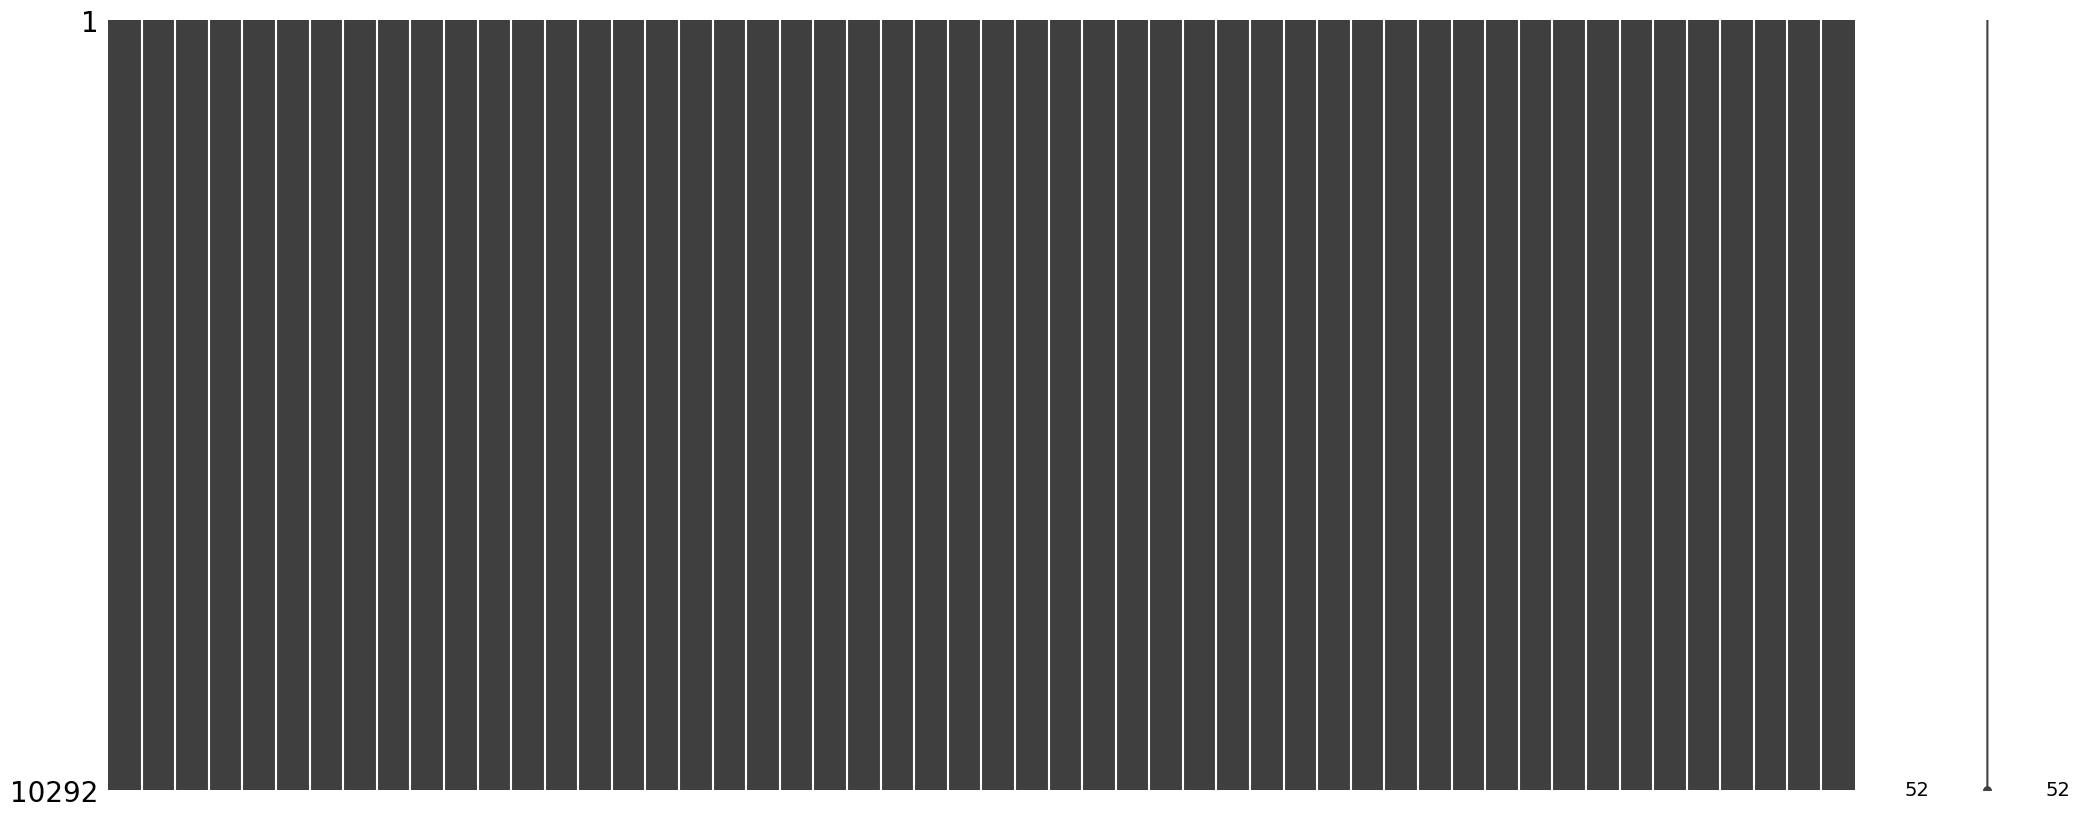

In [16]:
# Missingno visualizes missing data 
# Puts a dot for a NaN
mn.matrix(df)

<Axes: >

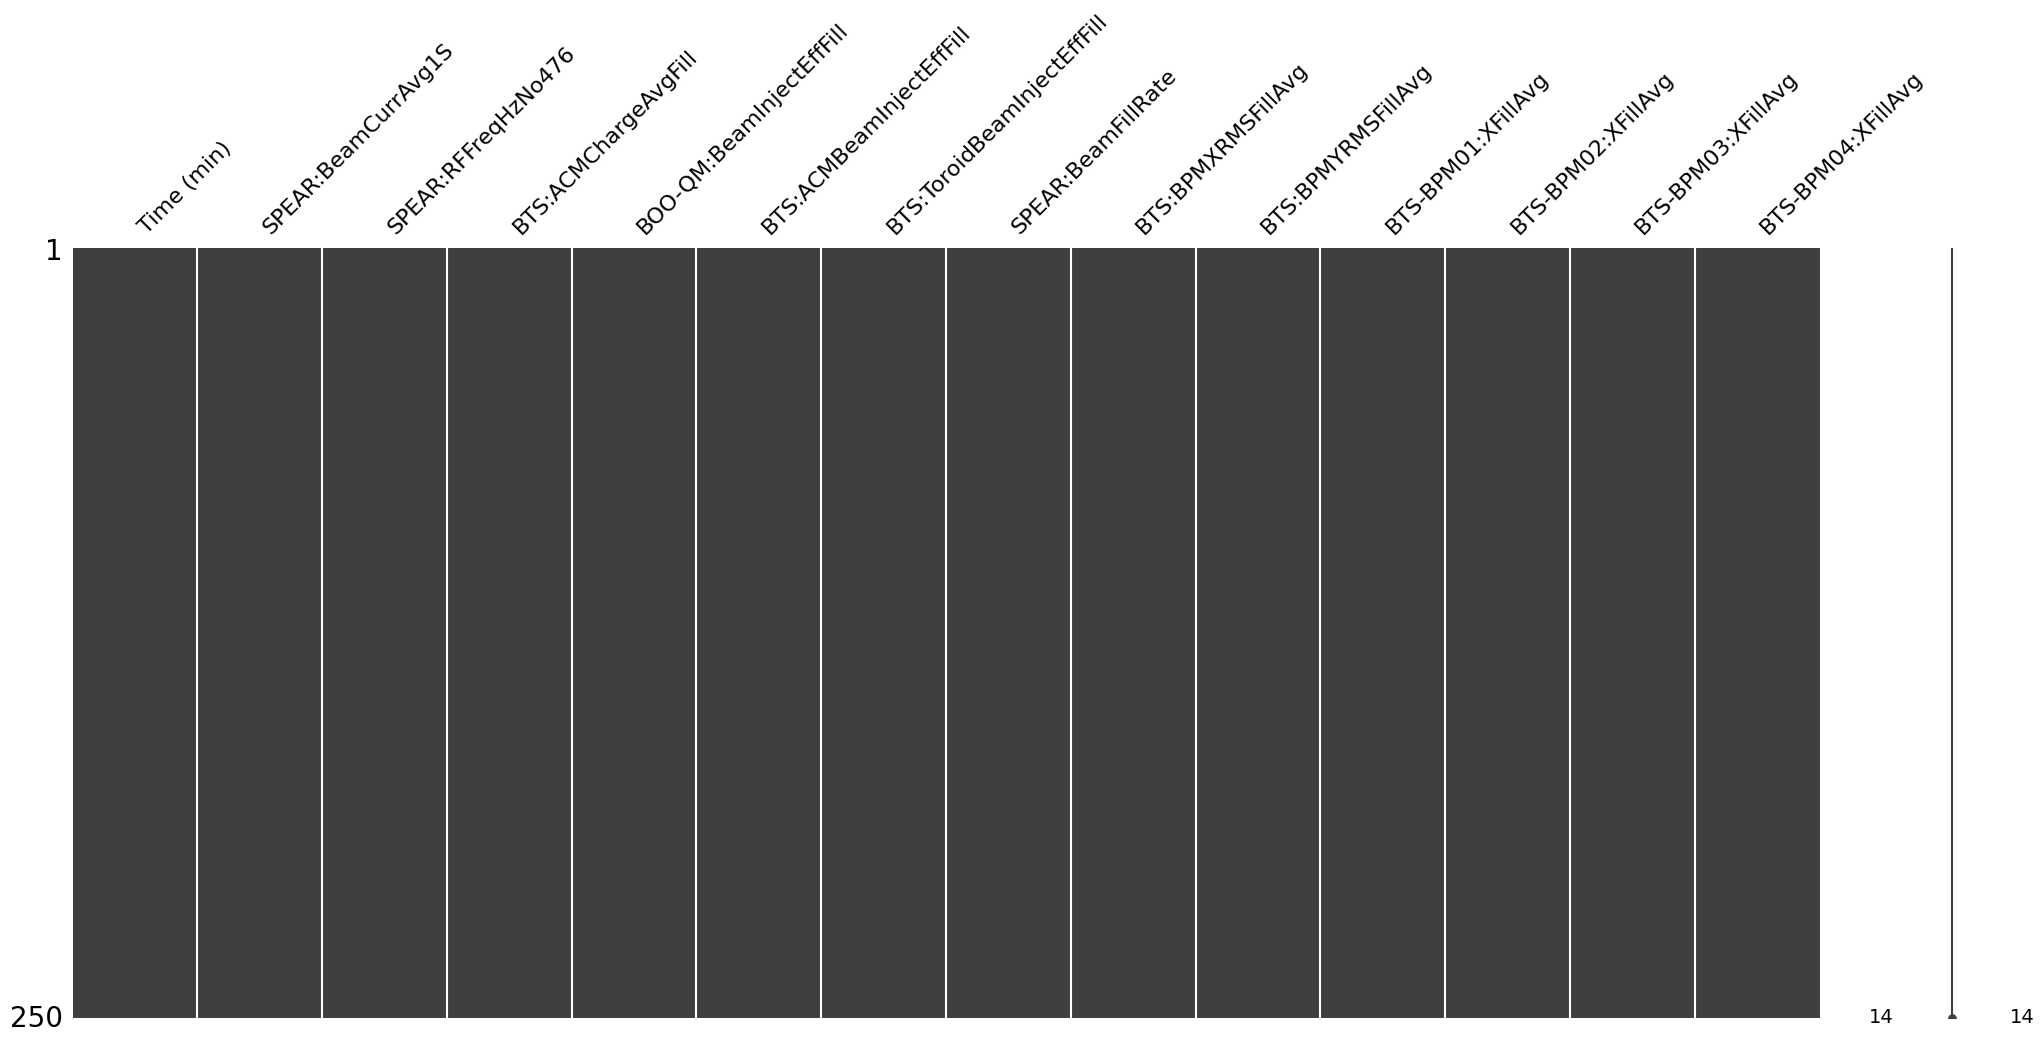

In [17]:
mn.matrix(df.iloc[:250,:14])

# Options For Missing Data
- `.dropna()` Drop the row or column with missing data 
- `.fillna(val)` Fill in NaNs with a given value 
- `.col.interpolate()  [For numeric]`

In [24]:
# use .value_counts to inspect object type data
df['SPEAR:BeamCurrAvg1S'].value_counts(dropna=False)

SPEAR:BeamCurrAvg1S
494.17987    4
493.83679    4
494.10104    4
494.16971    4
493.98712    4
            ..
494.21115    1
494.11270    1
494.14270    1
494.01468    1
494.13385    1
Name: count, Length: 8984, dtype: int64

In [24]:
# Combine two catagories
df.Q1.replace({'Prefer not to say': 'Other',
               'Prefer to self-describe': 'Other'}).value_counts()

Q1
Male      19430
Female     4010
Other       419
Name: count, dtype: int64

In [23]:
# Might use get_dummies when applying ML (or use OneHotEncoder from sklearn)
pd.get_dummies((df.Q1
  .replace({'Prefer not to say': 'Another',
               'Prefer to self-describe': 'Another'})
), drop_first=True)

,Female,Male
1,True,False
2,False,True
3,True,False
4,False,True
5,False,True
...,...,...
23855,False,True
23856,True,False
23857,False,True
23858,False,True


In [25]:
# The .assign will update the dataframe
(df
 .assign(**pd.get_dummies(df.Q1
    .replace({'Prefer not to say': 'Another',
                'Prefer to self-describe': 'Another'})
    , drop_first=True))
)

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,Female,Male
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,True,False
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,False,True
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,True,False
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,False,True
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,False,True
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,True,False
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,False,True
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,False,True


In [ ]:
# Store as a catagory instead of an object
# This saves memory for things with low "cardinality" 
# Instead of creating a whole object we only store an element of a finite small set
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'))
 )

# Question 2 - Age

In [26]:
# Age is a string :(
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'))
 .Q2                            
 )

1        45-49
2        30-34
3        30-34
4        35-39
5        22-24
         ...  
23855    45-49
23856    25-29
23857    22-24
23858    25-29
23859    25-29
Name: Q2, Length: 23859, dtype: object

In [27]:
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'))
 .Q2
 .value_counts(dropna=False)                            
 )

Q2
25-29    6159
22-24    5141
30-34    3776
18-21    3037
35-39    2253
40-44    1360
45-49     858
50-54     582
55-59     328
60-69     273
70-79      53
80+        39
Name: count, dtype: int64

In [29]:
# Reduce to the first two chars of the string
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'))
 .Q2
 .str.slice(0,2)
 )

1        45
2        30
3        30
4        35
5        22
         ..
23855    45
23856    25
23857    22
23858    25
23859    25
Name: Q2, Length: 23859, dtype: object

In [30]:
# Convert the prior slice to int
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'))
 )

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,45
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,30
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,30
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,35
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,45
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,25
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,22
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,25


# Question 3 - Countries

In [31]:
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'))
 .Q3.value_counts(dropna=False)
 )

Q3
United States of America                                4716
India                                                   4417
China                                                   1644
Other                                                   1036
Russia                                                   879
Brazil                                                   736
Germany                                                  734
United Kingdom of Great Britain and Northern Ireland     702
France                                                   604
Canada                                                   604
Japan                                                    597
Spain                                                    485
I do not wish to disclose my location                    394
Italy                                                    355
Australia                                                330
Turkey                                                   327
Poland               

In [32]:
# Limit the countries that are shown
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'))
 .Q3.apply(limit_countries)
 )

1        United States of America
2                         Another
3        United States of America
4        United States of America
5                           India
                   ...           
23855                     Another
23856                     Another
23857                     Another
23858                     Another
23859                     Another
Name: Q3, Length: 23859, dtype: object

In [33]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'))
 )

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,45,United States of America
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,30,Another
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,30,United States of America
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,35,United States of America
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,22,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,45,Another
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,25,Another
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,22,Another
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,25,Another


# Question 4 - Education

In [34]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'))
 .Q4.value_counts(dropna=False)
 )

Q4
Master’s degree                                                      10855
Bachelor’s degree                                                     7083
Doctoral degree                                                       3357
Some college/university study without earning a bachelor’s degree      967
Professional degree                                                    599
NaN                                                                    421
I prefer not to answer                                                 345
No formal education past high school                                   232
Name: count, dtype: int64

In [47]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'))
 .Q4.map({'Master’s degree': 18,
 'Bachelor’s degree': 16,
 'Doctoral degree': 20,
 'Some college/university study without earning a bachelor’s degree': 13,
 'Professional degree': 19,
 'I prefer not to answer': None,
 'No formal education past high school': 12})
 .fillna(11)
 .astype('int8')
 .describe()
 )

count    23859.000000
mean        17.227042
std          2.028437
min         11.000000
25%         16.000000
50%         18.000000
75%         18.000000
max         20.000000
Name: Q4, dtype: float64

<Axes: ylabel='Frequency'>

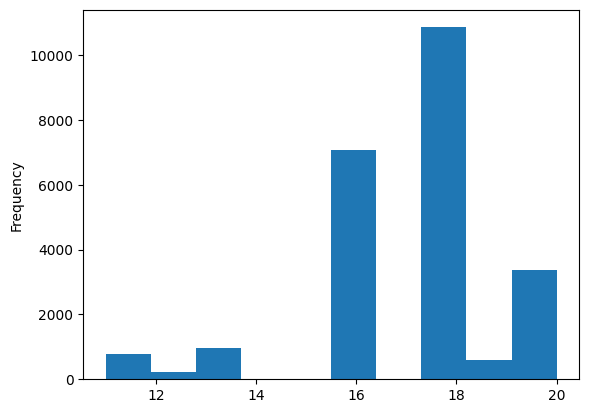

In [48]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'))
 .Q4.map({'Master’s degree': 18,
 'Bachelor’s degree': 16,
 'Doctoral degree': 20,
 'Some college/university study without earning a bachelor’s degree': 13,
 'Professional degree': 19,
 'I prefer not to answer': None,
 'No formal education past high school': 12})
 .fillna(11)
 .astype('int8')
 .plot.hist()
 )

<Axes: ylabel='Frequency'>

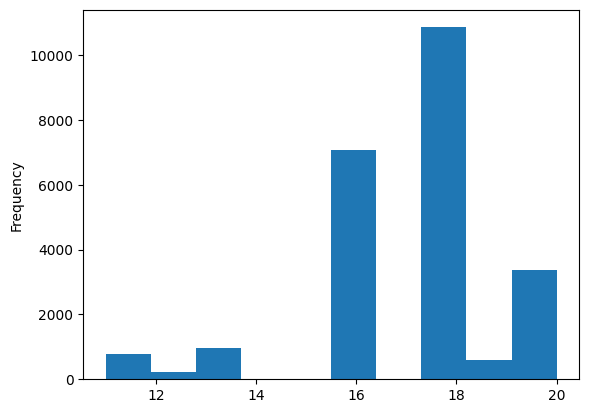

In [49]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'))
 .Q4.map({'Master’s degree': 18,
 'Bachelor’s degree': 16,
 'Doctoral degree': 20,
 'Some college/university study without earning a bachelor’s degree': 13,
 'Professional degree': 19,
 'I prefer not to answer': None,
 'No formal education past high school': 12})
 .fillna(11)
 .astype('int8')
 .plot.hist()
 )

In [50]:
# Sweet Refactor 
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .map({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education
    )
)

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country,education
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,NaN,-1,Female,45,United States of America,20
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,-1,Male,30,Another,16
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,NaN,NaN,NaN,NaN,-1,Female,30,United States of America,18
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,35,United States of America,18
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,22,India,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,-1,Male,45,Another,20
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,-1,Female,25,Another,18
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,-1,Male,22,Another,18
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,-1,Male,25,Another,11


# Question 5 - Study

In [51]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .map({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education
    )
 .Q5.value_counts(dropna=False)
)

Q5
Computer science (software engineering, etc.)                    9430
Engineering (non-computer focused)                               3705
Mathematics or statistics                                        2950
A business discipline (accounting, economics, finance, etc.)     1791
Physics or astronomy                                             1110
Information technology, networking, or system administration     1029
NaN                                                               912
Medical or life sciences (biology, chemistry, medicine, etc.)     871
Other                                                             770
Social sciences (anthropology, psychology, sociology, etc.)       554
Humanities (history, literature, philosophy, etc.)                269
Environmental science or geology                                  253
I never declared a major                                          128
Fine arts or performing arts                                       87
Name: count, dtyp

In [52]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .map({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val


(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education
    )
 .Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
 .apply(only_cs_stat_val)
)

1        other
2          eng
3           cs
4        other
5         stat
         ...  
23855       cs
23856      eng
23857       cs
23858    other
23859     stat
Name: Q5, Length: 23859, dtype: object

In [53]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .map({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val


(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category')
 )
)

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country,education,studies
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,-1,Female,45,United States of America,20,other
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,-1,Male,30,Another,16,eng
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,NaN,NaN,NaN,-1,Female,30,United States of America,18,cs
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,35,United States of America,18,other
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,22,India,18,stat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,-1,Male,45,Another,20,cs
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,-1,Female,25,Another,18,eng
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,-1,Male,22,Another,18,cs
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,-1,Male,25,Another,11,other


# Question 6 - Occupation

In [54]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .map({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val


(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category')
 )
 .Q6.value_counts(dropna=False)
)

Q6
Student                    5253
Data Scientist             4137
Software Engineer          3130
Data Analyst               1922
Other                      1322
Research Scientist         1189
NaN                         959
Not employed                842
Consultant                  785
Business Analyst            772
Data Engineer               737
Research Assistant          600
Manager                     590
Product/Project Manager     428
Chief Officer               360
Statistician                237
DBA/Database Engineer       145
Developer Advocate          117
Marketing Analyst           115
Salesperson                 102
Principal Investigator       97
Data Journalist              20
Name: count, dtype: int64

In [55]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .map({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category')
 )
    .Q6.apply(limit_occupation).value_counts()
)

Q6
Another              9760
Student              5253
Data Scientist       4137
Software Engineer    3130
Not employed          842
Data Engineer         737
Name: count, dtype: int64

In [56]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .map({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category'),
     occupation=df.Q6.apply(limit_occupation).astype('category')
 )
)

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country,education,studies,occupation
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,-1,Female,45,United States of America,20,other,Another
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,-1,Male,30,Another,16,eng,Another
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,NaN,NaN,-1,Female,30,United States of America,18,cs,Data Scientist
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,NaN,NaN,-1,Male,35,United States of America,18,other,Not employed
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,NaN,NaN,-1,Male,22,India,18,stat,Another
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,-1,Male,45,Another,20,cs,Another
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,-1,Female,25,Another,18,eng,Another
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,-1,Male,22,Another,18,cs,Software Engineer
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,-1,Male,25,Another,11,other,Another
